In [1]:
# %load scripts/start.py

In [2]:
# %load scripts/mc_paths.py

In [3]:
# %load scripts/plot_mpl.py

In [4]:
# %load scripts/plot_ezhc.py

In [5]:
# %load scripts/demo_ezhc.py

In [6]:
import warnings
warnings.filterwarnings('ignore', module='matplotlib')

%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import ezhc as hc

from IPython.display import display, IFrame


<IPython.core.display.Javascript object>

Open console to check js libs were loaded in page


In [7]:
np.random.seed(9875432)

Nb_path = 5     # nb of monte carlo paths
rate = 0.02     # rate 0.01=1%
vol = 0.25      # vol 0.25
Nb_bd = 600     # nb of bdays for a path
dt = 1.0/260    # bday duration in year

returns = (rate-vol**2/2)*dt+vol*np.sqrt(dt)*np.random.normal(size=(Nb_bd, Nb_path))
yields = (1.0+returns)
tracks = yields.cumprod(axis=0)

dates = pd.date_range(start=pd.Timestamp('2016-11-26'), periods=Nb_bd, freq='B')
df = pd.DataFrame(data=tracks, index=dates, columns=['track'+str(1+i) for i in range(Nb_path)])

display(df.head(3))
display(df.tail(3))


,track1,track2,track3,track4,track5
2016-11-28,1.004234,0.995202,1.007379,1.001918,1.018057
2016-11-29,0.986582,1.051191,1.004700,0.990529,1.041361
2016-11-30,0.953032,1.069561,1.004358,0.993498,1.050969


,track1,track2,track3,track4,track5
2019-03-13,0.934417,0.804080,1.172948,0.754263,1.023399
2019-03-14,0.933038,0.804331,1.169192,0.752184,0.992154
2019-03-15,0.917463,0.801085,1.162551,0.765789,0.993351


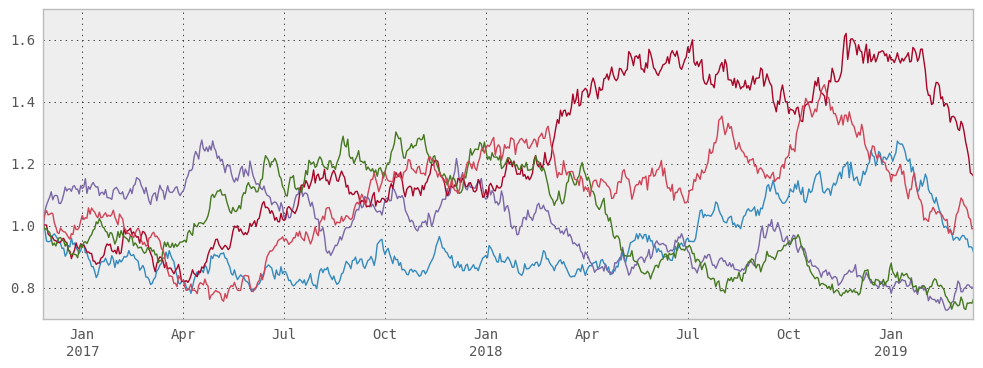

In [8]:
df.plot(figsize=(12, 4), legend=False);

In [9]:
g = hc.Highstock()

g.chart.height = 550
g.legend.enabled = True
g.legend.layout = 'horizontal'
g.legend.align = 'center'
g.legend.maxHeight = 100
g.tooltip.enabled = True
g.tooltip.valueDecimals = 2
g.exporting.enabled = True

g.chart.zoomType = 'xy'
g.title.text = 'Monte Carlo Paths'
g.subtitle.text = 'Plotted with ezhc'

g.plotOptions.series.compare = 'percent'
g.yAxis.labels.formatter = hc.scripts.FORMATTER_PERCENT
g.tooltip.pointFormat = hc.scripts.TOOLTIP_POINT_FORMAT_PERCENT
g.tooltip.positioner = hc.scripts.TOOLTIP_POSITIONER_CENTER_TOP

g.xAxis.gridLineWidth = 1.0
g.xAxis.gridLineDashStyle = 'Dot'
g.yAxis.gridLineWidth = 1.0
g.yAxis.gridLineDashStyle = 'Dot'

g.credits.enabled = True
g.credits.text = 'Source: XXX Cross Asset Solutions.'
g.credits.href = 'http://www.example.com'

g.series = hc.build.series(df)

g.plot(save=False)

In [10]:
IFrame('http://www.highcharts.com/stock/demo/compare', width='100%', height=600)